In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.eye(3,k=-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [4]:
a=np.matrix([[1,2,3],[4,5,6]])
a

matrix([[1, 2, 3],
        [4, 5, 6]])

In [5]:
a[0][0]

matrix([[1, 2, 3]])

In [6]:
d=np.ones(5)
d[1]=2
d

array([1., 2., 1., 1., 1.])

In [7]:
n=5
u0,u1=1.,2.#端点
dx=1.0/(n+1)#分段
A=(np.eye(n,k=-1)-2*np.eye(n)+np.eye(n,k=1))/dx**2
A

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

In [8]:
b=-5*np.ones(n)
b[0]-=u0/dx**2
b[n-1]-=u1/dx**2
b#设立 非齐次项

array([-41.,  -5.,  -5.,  -5., -77.])

In [9]:
u=np.linalg.solve(A,b)
u

array([1.51388889, 1.88888889, 2.125     , 2.22222222, 2.18055556])

Text(0.5, 0, '$x^2$')

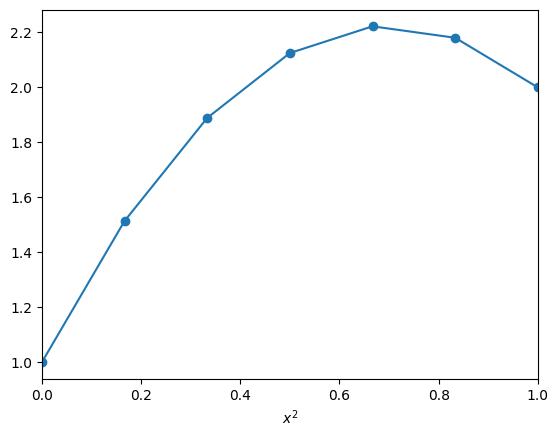

In [10]:
f=lambda x:-2.5*x**2+3.5*x+1
x=np.linspace(0,1,n+2)
y=np.hstack([[u0],u,[u1]])
plt.xlim(0,1)
plt.plot(x,y,'o-')
plt.xlabel('$x^2$')

In [11]:
a=np.array([[1,2,3,4],[4,5,6,7]])
a[1][1]

5

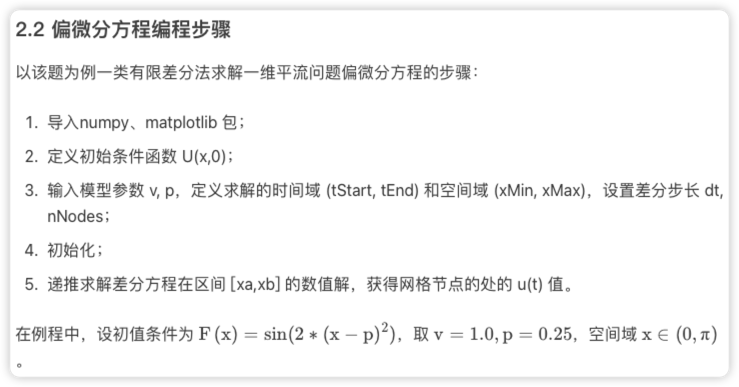
$u_t + vu_x=0$

In [12]:
#定义初始函数
def F(x):
    u0=np.sin(2*(x-0.25)**2)
    return u0
    pass
#输入参数
v=1.0
t0=0
te=1.0
x0=0
x1=np.pi
dt=0.02 #时间步长
nnodes=100 #空间网格数
# 初始化条件
nsteps=round(te/dt)
dx=x1/nnodes #空间的步长
x=np.linspace(x0,x1,101)
ut0=F(x)# t=0的值
u=ut0.copy()
ujp=ut0.copy()
fig,axes=plt.subplots(1,1)
for i in range(nsteps):
    plt.clf()
    # 计算u(j+1)
    for j in range(101):
        ujp[j]=u[j]-(v*dt/dx)*(u[j]-u[j-1])
        pass
    #更新边界条件
    u=ujp.copy()
    axes.plot(x,u,'b-')
    axes.title("Advection equation with finite difference method, t = %1.f" % (t0 + dt))
    plt.pause(0.001)
    pass



    


TypeError: 'Text' object is not callable

<Figure size 640x480 with 0 Axes>

In [ ]:
a=np.linspace(0,2,3)
print(a,type(a))
a[1]=10
a[-1]

[0. 1. 2.] <class 'numpy.ndarray'>


2.0

In [ ]:
for i in range(3):
    print(i-1)

-1
0
1


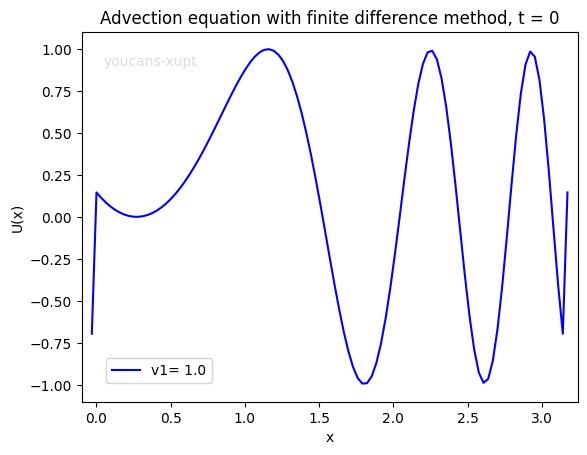

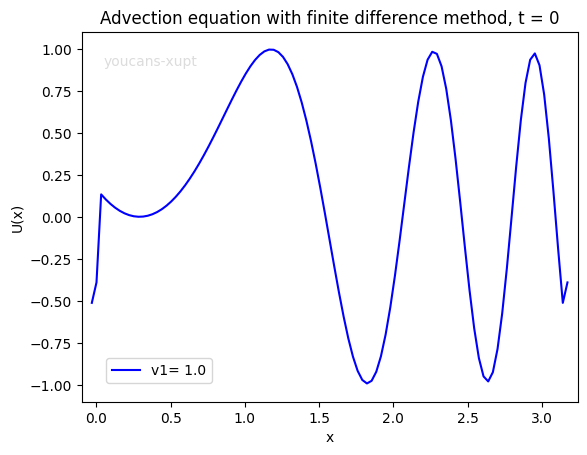

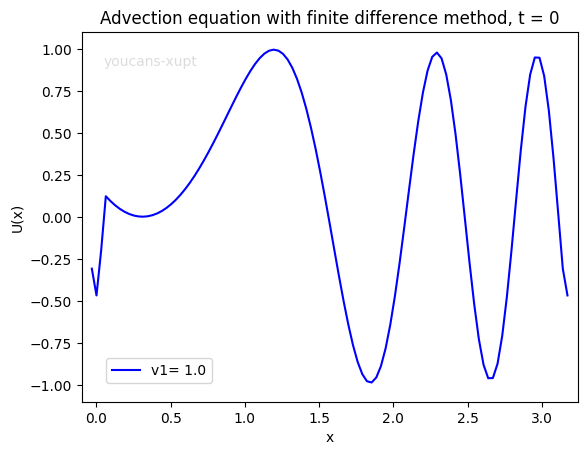

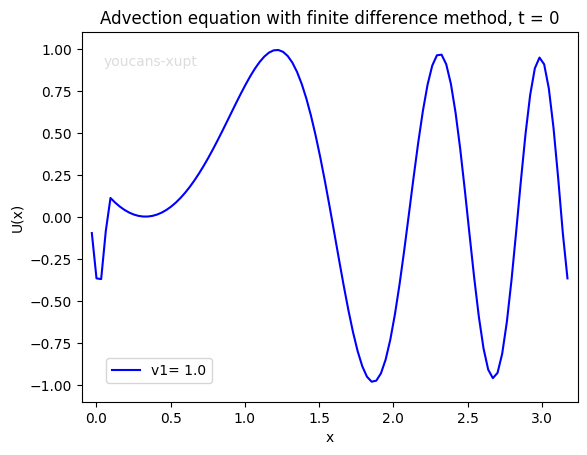

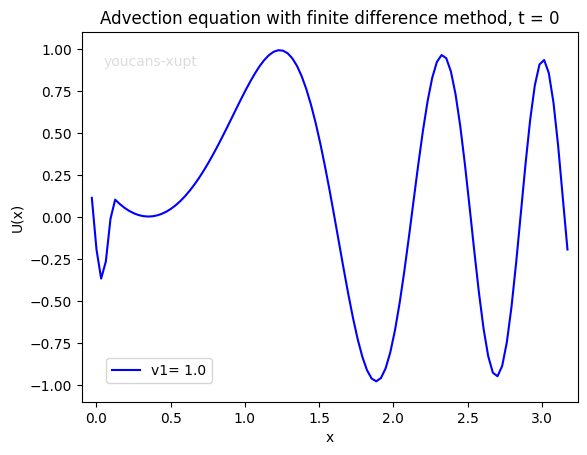

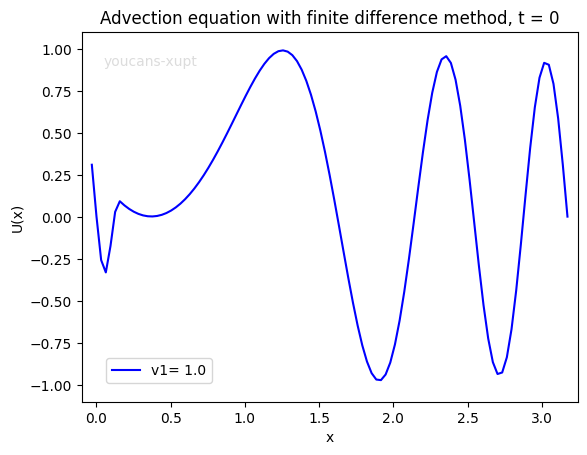

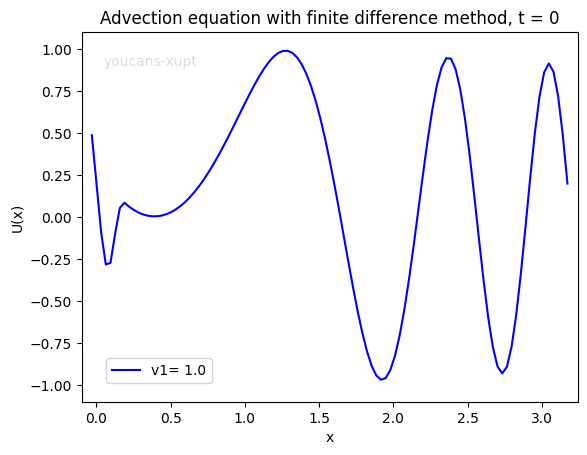

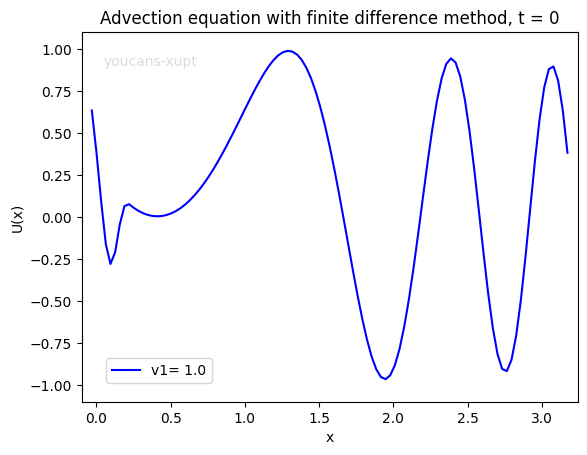

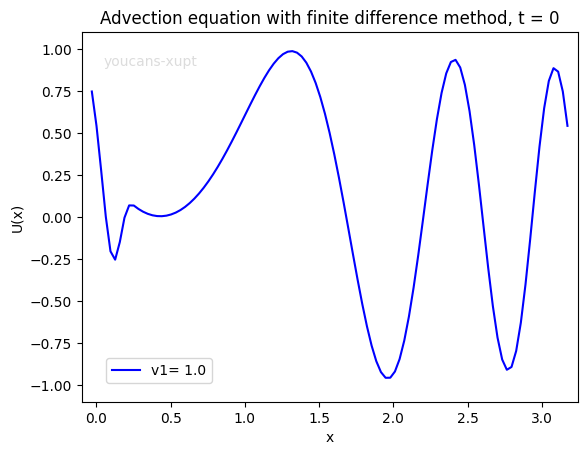

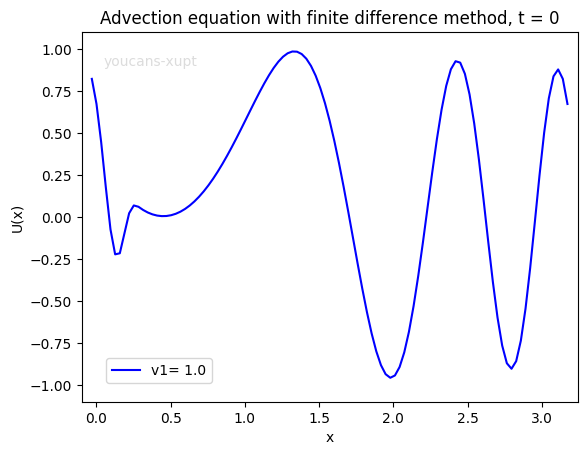

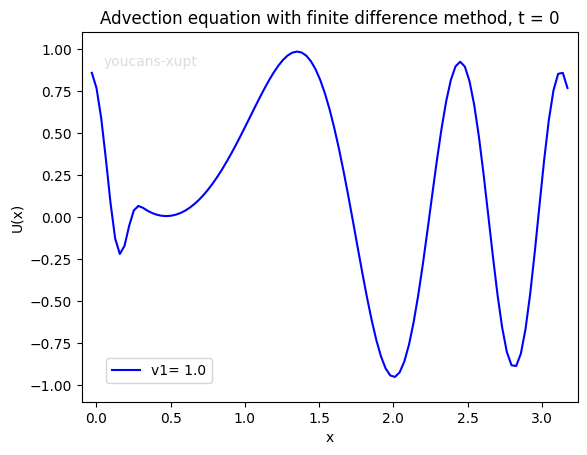

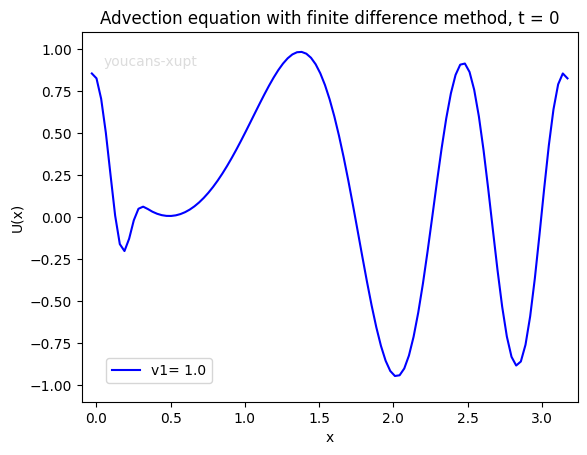

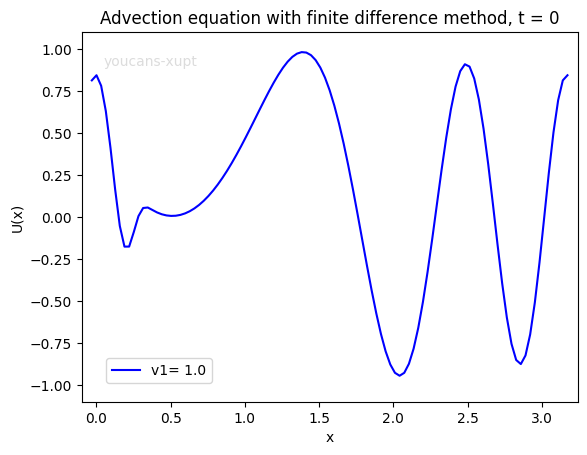

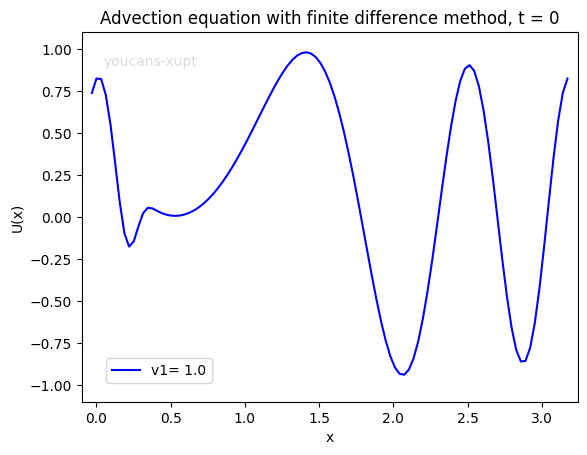

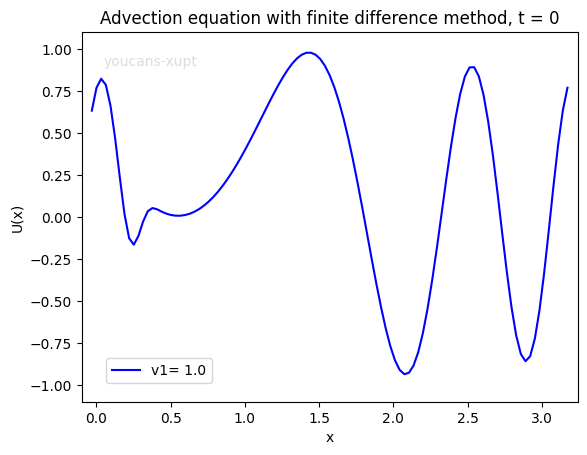

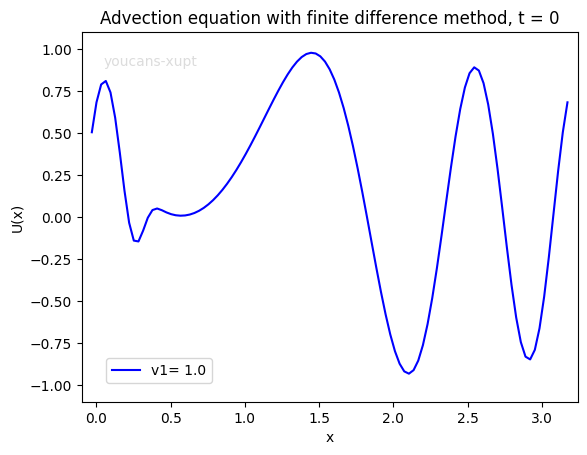

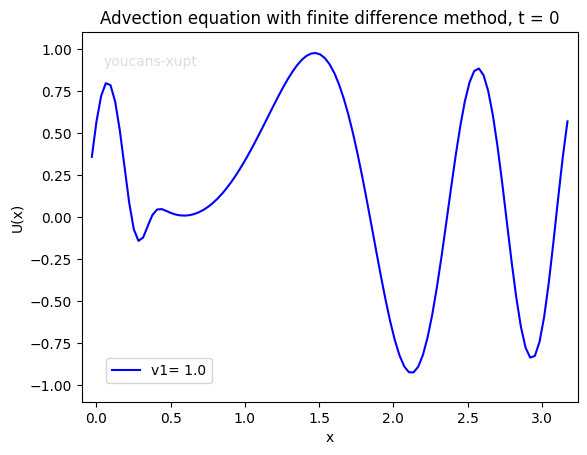

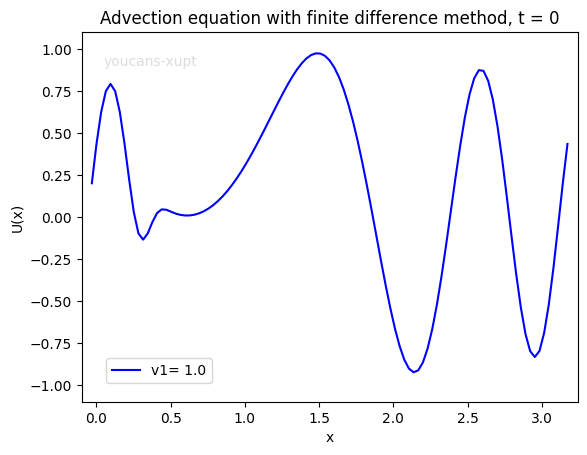

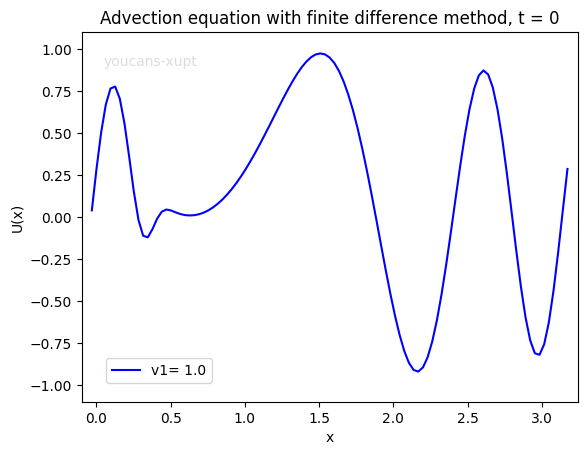

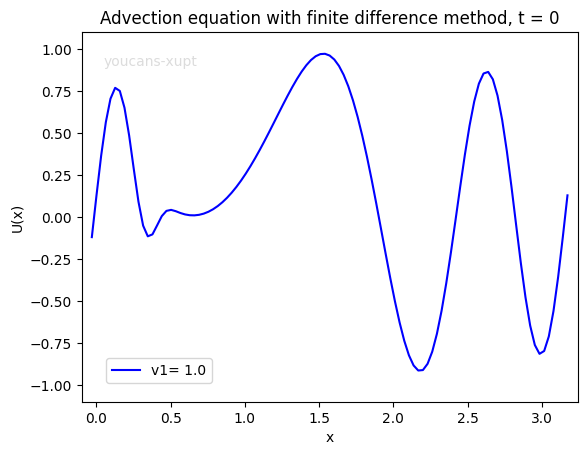

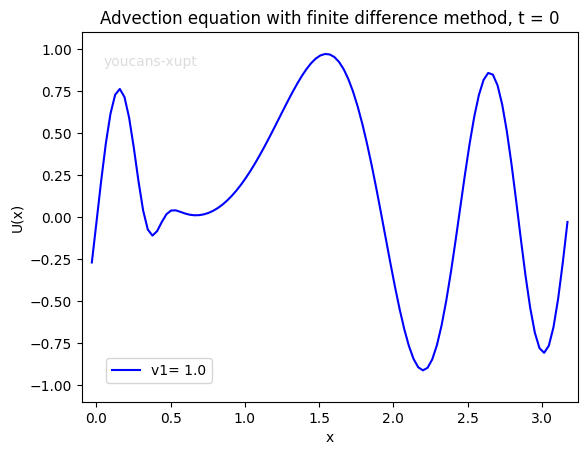

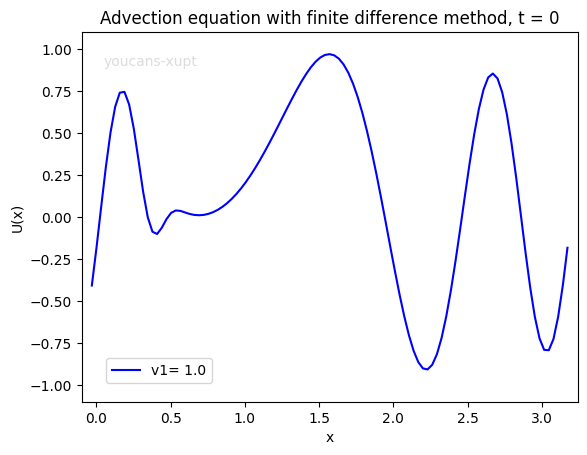

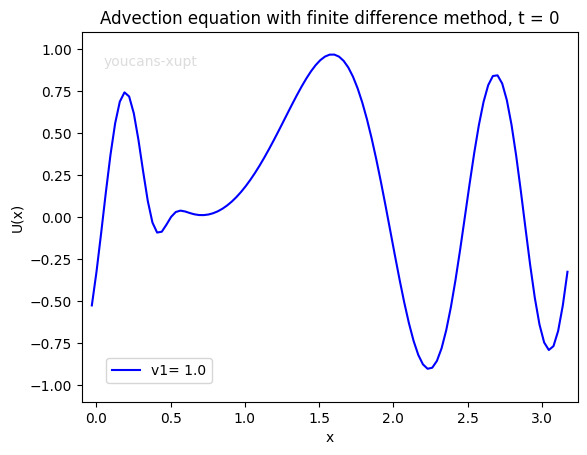

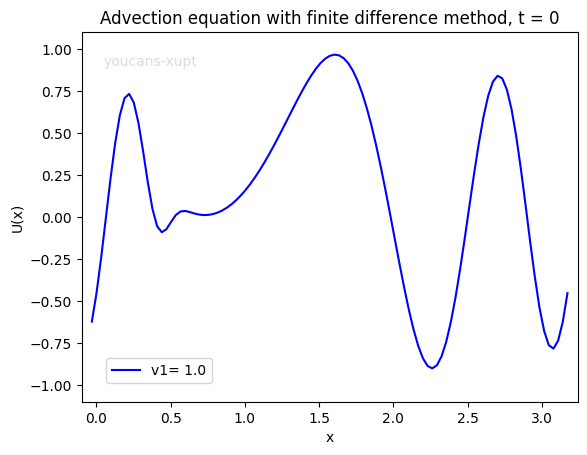

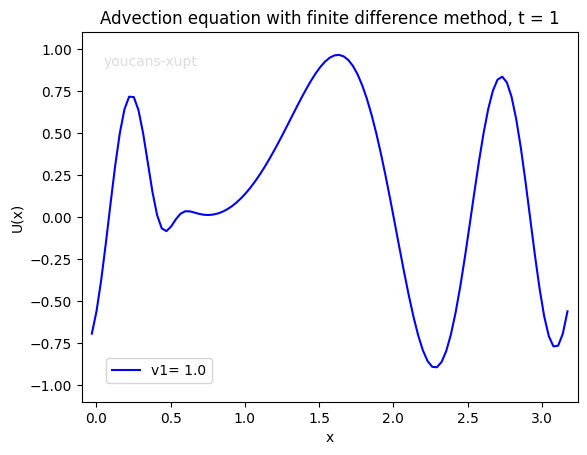

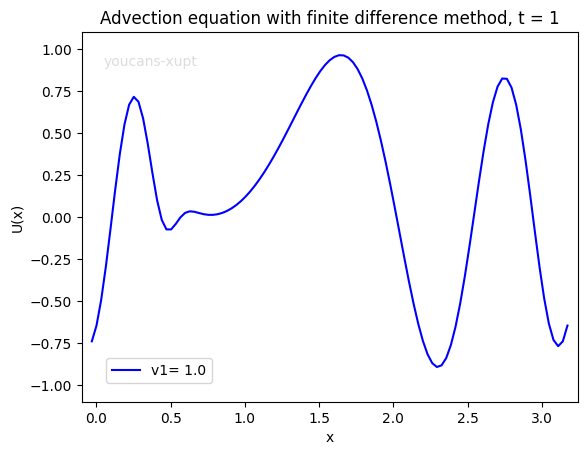

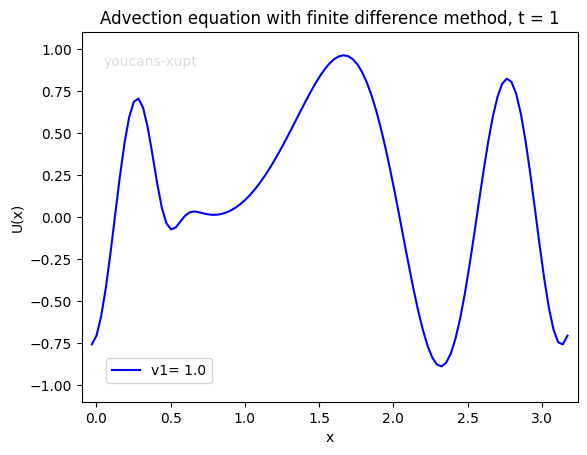

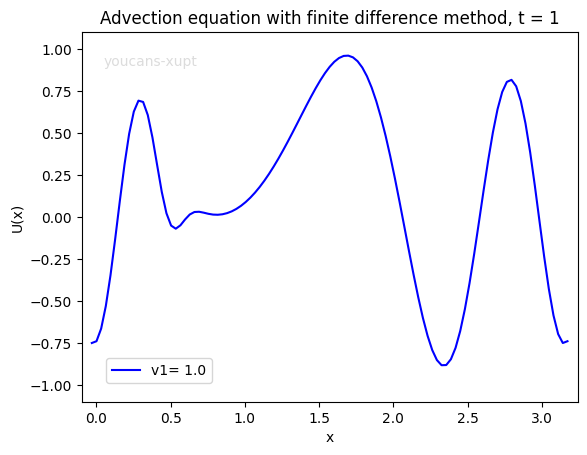

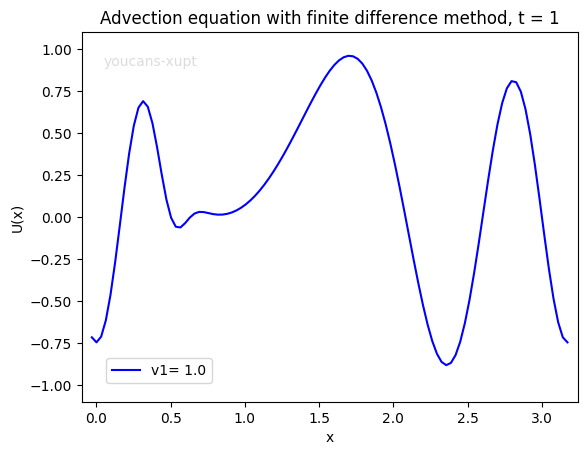

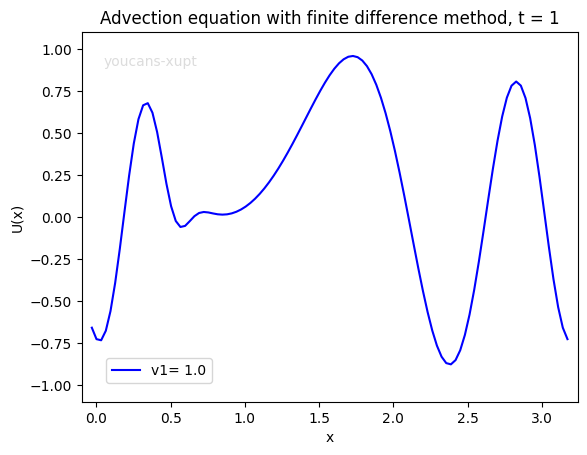

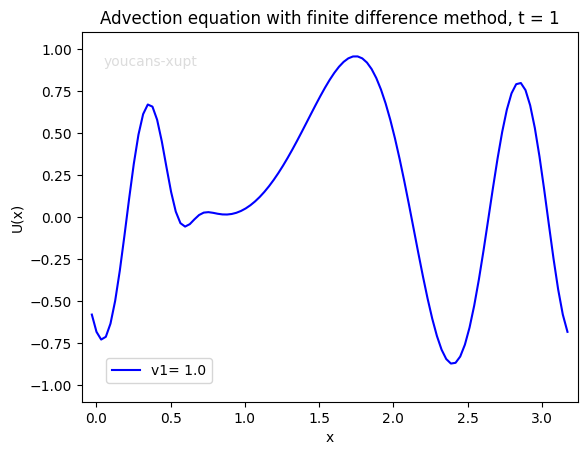

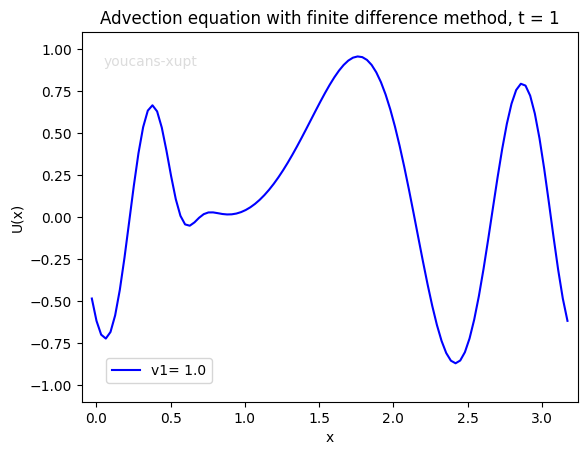

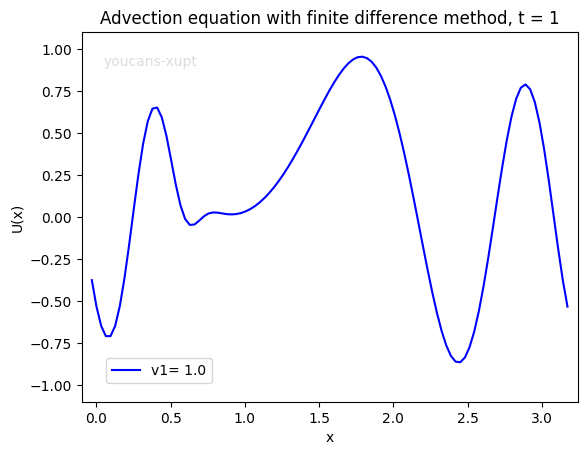

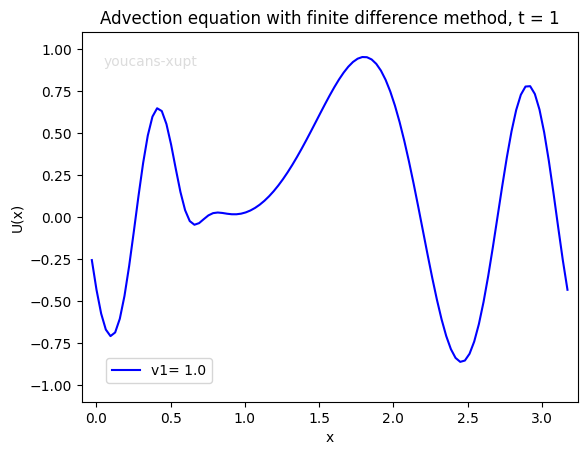

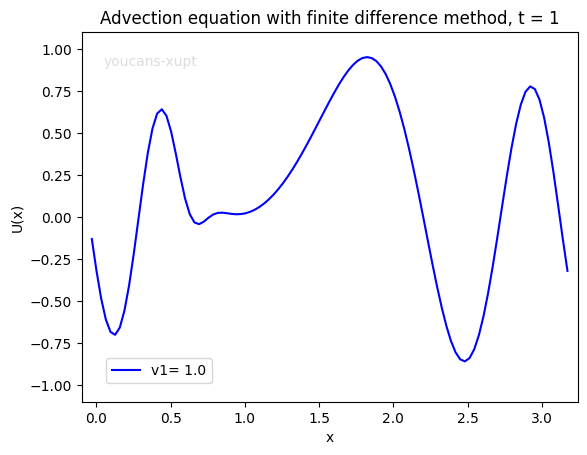

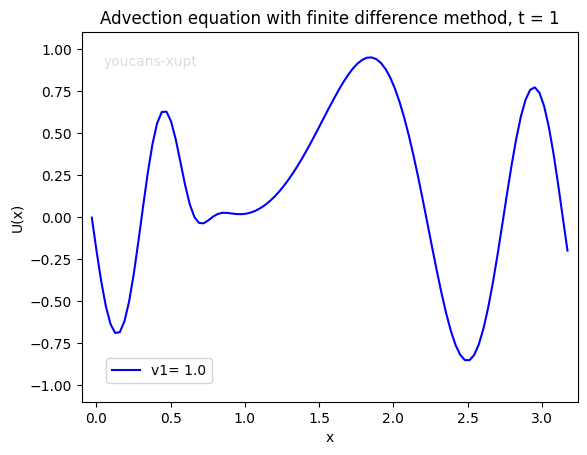

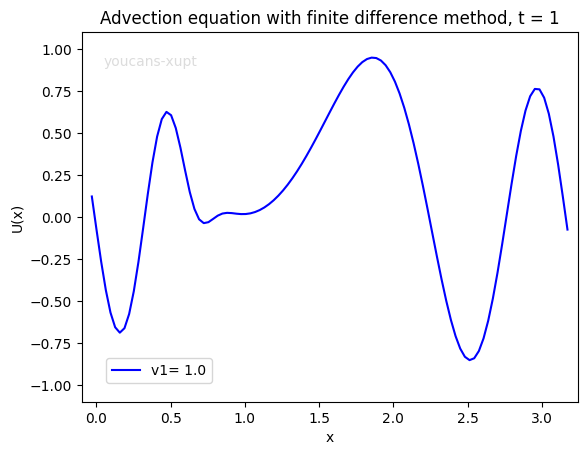

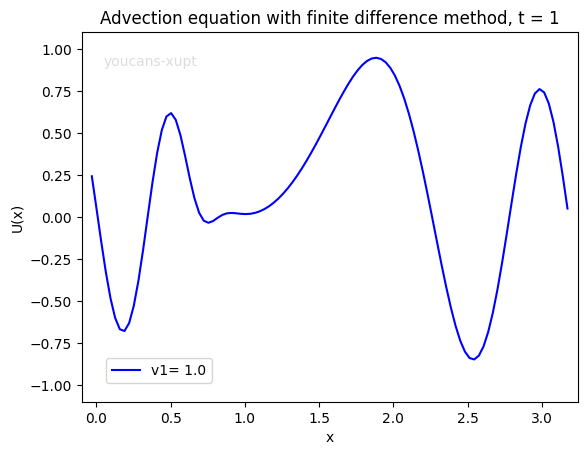

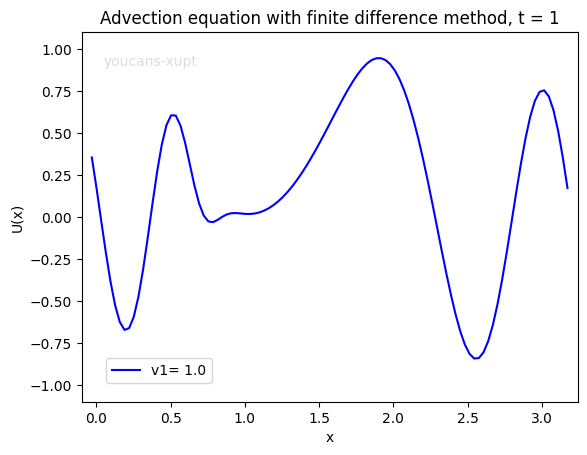

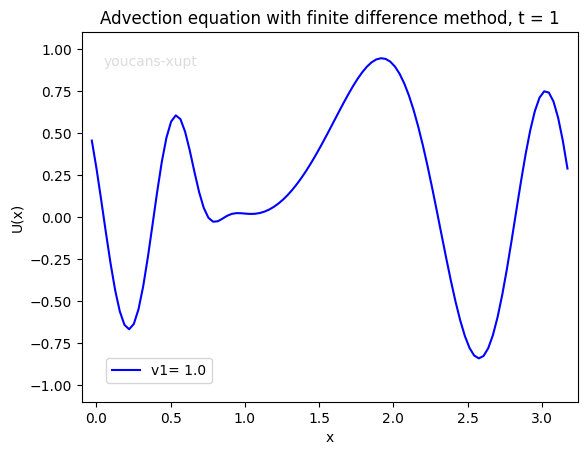

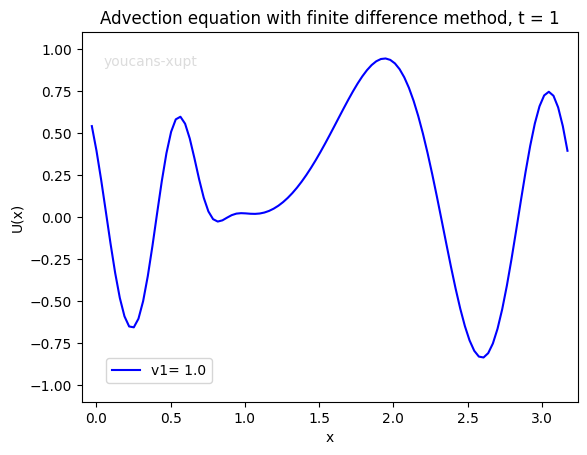

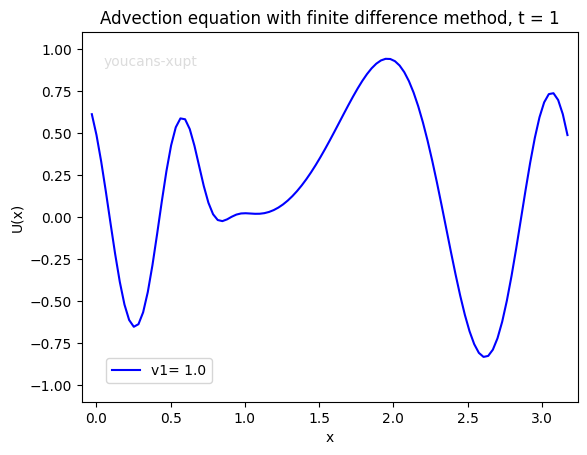

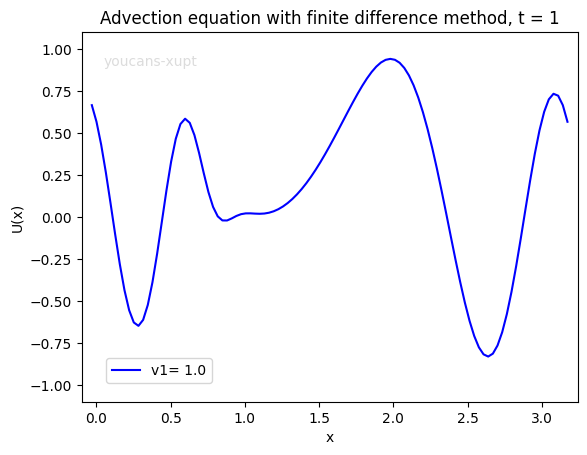

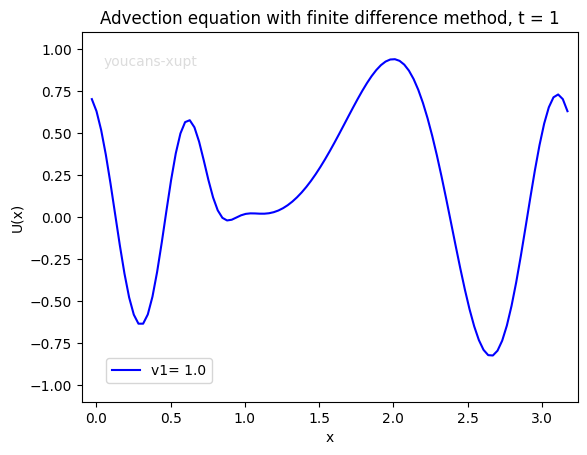

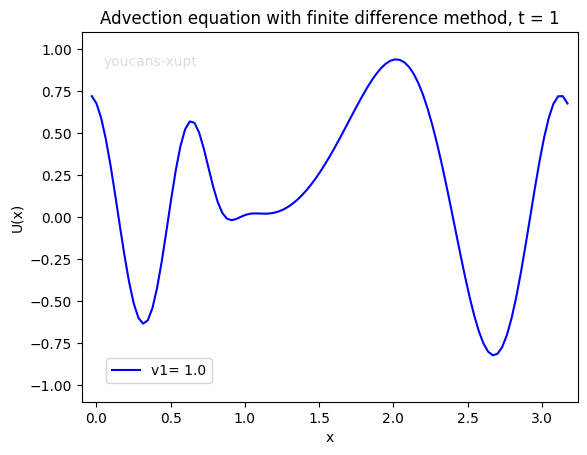

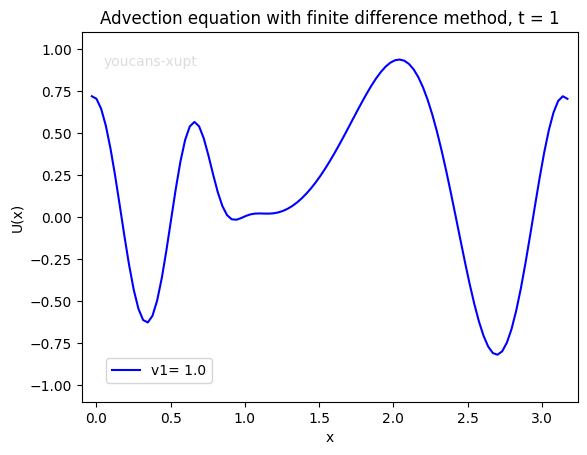

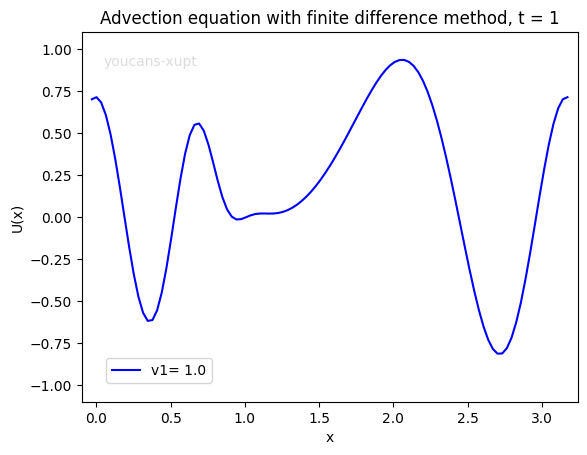

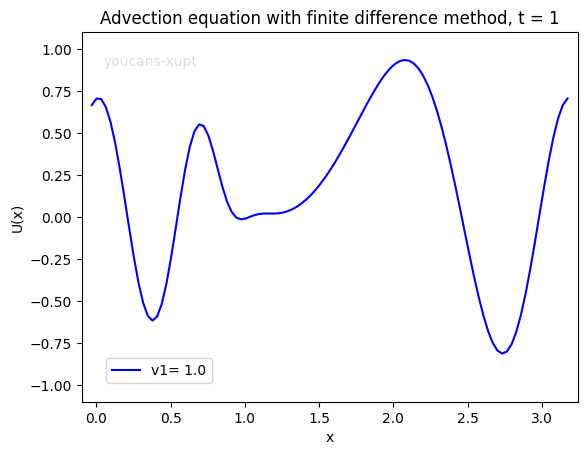

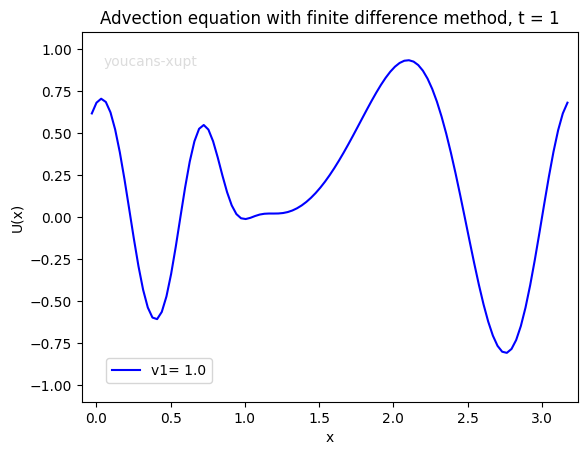

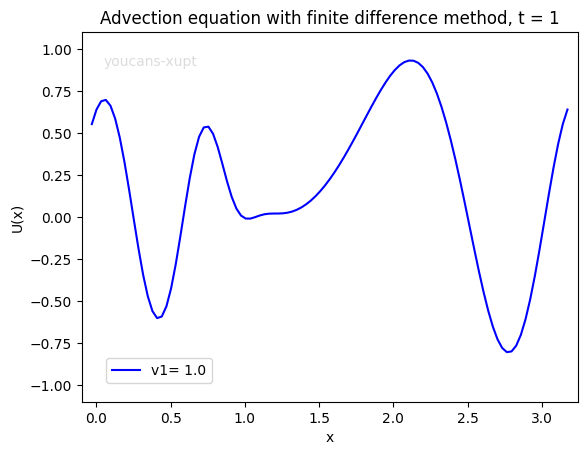

In [ ]:
# mathmodel13_v1.py
# Demo10 of mathematical modeling algorithm
# Solving partial differential equations
# 偏微分方程数值解法

import numpy as np
import matplotlib.pyplot as plt

# 1. 一维平流方程 (advection equation)
# U_t + v*U_x = 0

# 初始条件函数 U(x,0)
def funcUx0(x, p): 
    u0 = np.sin(2 * (x-p)**2)
    return u0

# 输入参数
v1 = 1.0  # 平流方程参数，系统速度
p = 0.25  # 初始条件函数 u(x,0) 中的参数

tc = 0  # 开始时间
te = 1.0  # 终止时间: (0, te)
xa = 0.0  # 空间范围: (xa, xb)
xb = np.pi
dt = 0.02  # 时间差分步长
nNodes = 100  # 空间网格数

# 初始化
nsteps = round(te/dt)
dx = (xb - xa) / nNodes
x = np.arange(xa-dx, xb+2*dx, dx)
ux0 = funcUx0(x, p)

u = ux0.copy()  # u(j)
ujp = ux0.copy()  # u(j+1)

# 时域差分
for i in range(nsteps):
    plt.clf()  # 清除当前 figure 的所有axes, 但是保留当前窗口

    # 计算 u(j+1)
    for j in range(nNodes + 2):
        ujp[j] = u[j] - (v1 * dt/dx) * (u[j] - u[j-1])

    # 更新边界条件
    u = ujp.copy()
    u[0] = u[nNodes + 1]
    u[nNodes+2] = u[1]

    # 绘图
    plt.plot(x, u, 'b-', label="v1= 1.0")
    plt.axis((xa-0.1, xb + 0.1, -1.1, 1.1))
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.legend(loc=(0.05,0.05))
    plt.title("Advection equation with finite difference method, t = %1.f" % (tc + dt))
    plt.text(0.05,0.9,"youcans-xupt",color='gainsboro')
    plt.pause(0.001)
    tc += dt

plt.show()


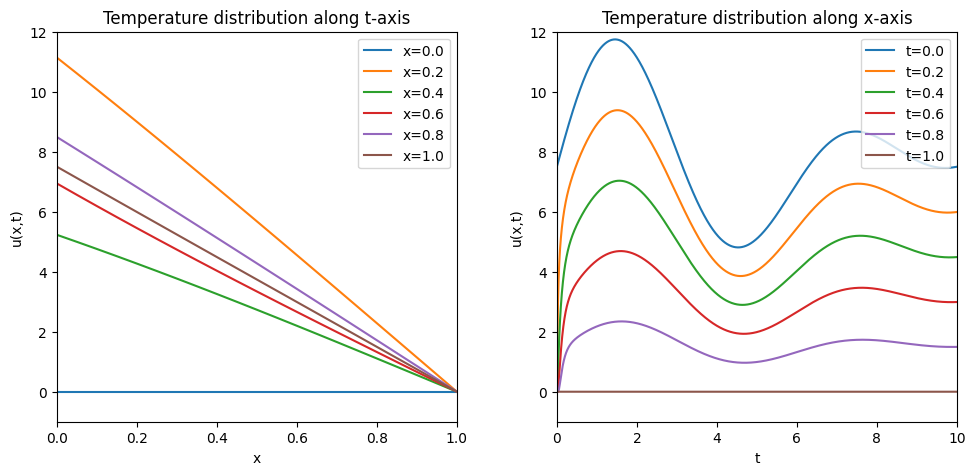

In [ ]:
# mathmodel13_v1.py
# Demo10 of mathematical modeling algorithm
# Solving partial differential equations
# 偏微分方程数值解法

import numpy as np
import matplotlib.pyplot as plt

# 2. 一维热传导方程（抛物型偏微分方程）
# pu/pt = l*p2u/px2

# 模型参数
L = 1.0  # 细杆长度
lam = 1.0  # 热扩散率
tc = 0  # 开始时间
te = 10.0  # 终止时间: (0, te)

# 初始化
dx = 0.05  # 空间步长
dt = 0.001  # 时间步长
nNodes = round(L/dx)  # 空间网格数
nSteps = round(te/dt)  # 时序网格数
K = lam * dt/(dx**2)  # lambda * dt/dx^2
U = np.zeros([nNodes+1, nSteps+1])  # 建立二维数组

# 边界条件
for j in np.arange(0, nSteps+1):  # 时间序列
    U[0,j] = 7.5 + (nSteps-j)/2000 * np.sin(j/1000)/(1+np.exp(-j))
    U[nNodes,j] = 0.0  # 每一时点的边界条件

# 初始条件
for i in np.arange(0, nNodes):  # 空间序列
    # U[i,0]= 0.2*i*h*(L-i*h)  # 初始条件是 x 的函数
    U[i,0]= 0  # 每一位置的初始条件

# 时域差分法求解
for j in np.arange(0, nSteps):  # 时间步长
    for i in np.arange(1, nNodes):  # 空间步长
        U[i,j+1] = K*U[i+1,j] + (1-2*K)*U[i,j] + K*U[i-1,j]

# 绘图
xZone = np.arange(0, (nNodes+1)*dx, dx)  # 建立空间网格
tZone = np.arange(0, (nSteps+1)*dt, dt)  # 建立空间网格
fig = plt.figure(figsize=(10, 6))
rect1 = [0.05, 0.2, 0.4, 0.65]  # [左, 下, 宽, 高], 0.0~1.0
ax1 = plt.axes(rect1)
for k in range(0,nSteps+1,round(nSteps/5)):
    ax1.plot(xZone, U[:,k], label=r"x={}".format(k/nSteps))
ax1.set_ylabel('u(x,t)')
ax1.set_xlabel('x')
ax1.set_xlim(0,L)
ax1.set_ylim(-1,12)
ax1.set_title("Temperature distribution along t-axis")
ax1.legend(loc='upper right')
rect2 = [0.55, 0.2, 0.4, 0.65]  # [左, 下, 宽, 高], 0.0~1.0
ax2 = plt.axes(rect2)
for k in range(0,nNodes+1,round(nNodes/5)):  # U[nNodes,k] = 0.0
    ax2.plot(tZone, U[k,:], label=r"t={}".format(k/nNodes))
ax2.set_ylabel('u(x,t)')
ax2.set_xlabel('t')
ax2.set_xlim(0,te)
ax2.set_ylim(-1,12)
ax2.set_title("Temperature distribution along x-axis")
ax2.legend(loc='upper right')
plt.show()


In [ ]:
from scipy.integrate import quad

# 定义要积分的函数
def f(x):
    return x**2

# 调用quad函数进行积分计算
result0, error = quad(f, 0, 1)  # 积分区间为[0, 1]

# 打印积分结果和误差
print("积分结果:", result0)
print("误差估计:", error)


积分结果: 0.33333333333333337
误差估计: 3.700743415417189e-15


In [ ]:
import numba

# 使用Numba装饰器将函数标记为JIT可编译函数
@numba.njit(nopython=True)
def f(x):
    return x**2

# 积分计算函数
@numba.njit(nopython=True)
def compute_integral():
    a = 0.0  # 积分下限
    b = 1.0  # 积分上限
    N = 1000  # 积分步数
    dx = (b - a) / N  # 步长

    integral = 0.0
    for i in range(N):
        x = a + i * dx
        integral += f(x)

    integral *= dx
    return integral

# 调用积分计算函数
result = compute_integral()

# 打印积分结果
print("积分结果:", result)


/Users/houchong/opt/anaconda3/envs/torch/lib/python3.9/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


积分结果: 0.33283349999999995


In [ ]:
import random

def monte_carlo_integration(f, a, b, num_samples):
    total = 0.0
    for _ in range(num_samples):
        x = random.uniform(a, b)
        print(x)
        total += f(x)
    
    return (b - a) * total / num_samples

# Define the function to integrate
def my_function(x):
    return x**2

# Define the integration limits
a = 0
b = 1

# Set the number of samples
num_samples = 10

# Perform Monte Carlo integration
result = monte_carlo_integration(my_function, a, b, num_samples)
print("Approximate integral:", result,result - result0)


0.5033738269010795
0.7926728998741099
0.8167888258472503
0.9249785291727076
0.9608921186794551
0.2735868511308991
0.028828364156882835
0.24280267329771255
0.7766495294713694
0.9219101421266646
Approximate integral: 0.49154952446399014 0.15821619113065677
